# Importing the necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
from IPython import display
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape, Dropout
from tensorflow.keras.models import Model, Sequential
import matplotlib.pyplot as plt

# Loading the data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Viewing the data

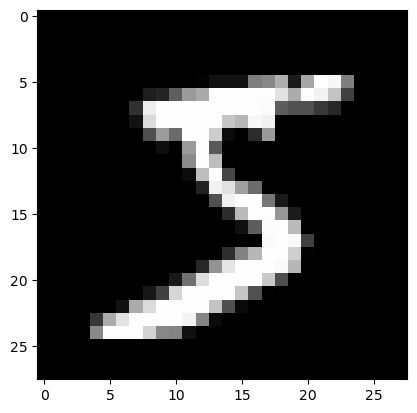

In [3]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

# Deciding the latent space size

In [4]:
LATENT_SIZE = 32

# Creating the encoder

In [5]:
encoder = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, activation='leaky_relu'),
    Dropout(0.5),

    Dense(256, activation='leaky_relu'),
    Dropout(0.5),

    Dense(128, activation='leaky_relu'),
    Dropout(0.5),

    Dense(64, activation='leaky_relu'),
    Dropout(0.5),

    Dense(LATENT_SIZE, activation='leaky_relu') 
])

* In this case when creating the autoencoder model; when we start to create the decoder model we do not add a reshape layer to the decoder.

* Dense layers inherently work with flat (1D) vectors. Each layer's output is a flat vector, which makes it straightforward to connect dense layers in sequence without needing to reshape the data because the data remains in a flat vector form throughout the entire model (from input to latent representation to output), there is no need to reshape it into a different format.

* Convolutional layers operate on multi-dimensional data (e.g., 2D images with height, width, and channels) so when using convolutional layers in an autoencoder, reshaping is often necessary to convert between the flat latent representation and the multi-dimensional format required by the convolutional layers (e.g., using Reshape before Conv2DTranspose).

# Creating the decoder

In [6]:
decoder = Sequential([
    Dense(64, activation='leaky_relu', input_shape=(LATENT_SIZE,)),
    Dropout(0.5),

    Dense(128, activation='leaky_relu'),
    Dropout(0.5),

    Dense(256, activation='leaky_relu'),
    Dropout(0.5),

    Dense(512, activation='leaky_relu'),
    Dropout(0.5),

    Dense(784, activation='leaky_relu'), #input_shape = (28,28) -> no. of neurons = 28 * 28
    Reshape((28,28))
])

* The **Reshape layer** then converts the 1D vector of 784 elements back into a 2D 28x28 image format. This is crucial for visualizing the reconstructed image and for calculating the loss during training (e.g., comparing the reconstructed image with the original image).

In [7]:
img = Input(shape = (28, 28))

In [8]:
latent_vector = encoder(img)
output = decoder(latent_vector)

In [9]:
model = Model(inputs = img, outputs = output)

In [10]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

# Training the model

In [11]:
EPOCHS = 60

1/1 [==============================] - 0s 17ms/step


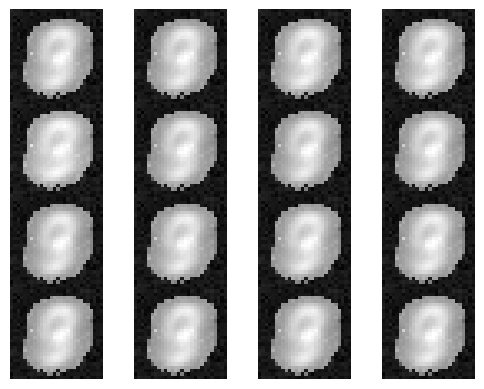

-------------- EPOCH 59 -------------
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2916 - accuracy: 0.0940


In [12]:
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4,4,1,28,28))
    display.clear_output()

    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap="gray")
            axs[i, j].axis("off")

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    print("--------------", "EPOCH", epoch, "-------------")
    model.fit(x_train, x_train)